In [176]:
#Importing Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import random
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from functools import reduce
from sklearn.cluster import KMeans
import psycopg2
from sqlalchemy import create_engine
from config import DB_HOST, DB_USER, DB_PASS, DB_PORT

In [177]:
#Creating engine to access online databse
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/us_emissions_db')

In [178]:
#reading merged table and year averages table
merged_table = pd.read_sql_table('gdp_pop_sector_emissions', con=engine)
year_avg = pd.read_sql_table('year_averages', con=engine)
year_avg.columns = ['year', 'avgpop', 'avggdp', 'avgghg']

In [179]:
#displaying merged table and year table
display(merged_table.head())
display(year_avg.head())

,index,Country,State,Year,GDP,Population,Sector,allghg,CH4,CO2,N2O,F-Gas,outcomes
0,0,US,AL,1997,3.724787e+10,4367935,Agriculture,6.889241,3.392917,0.016045,4.028508,1.128290,0
1,1,US,AL,1998,3.936806e+10,4404701,Agriculture,6.954451,3.137611,0.016269,3.751630,1.290703,1
2,2,US,AL,1999,4.151366e+10,4430141,Agriculture,6.560038,3.074048,0.013043,3.880403,1.376542,0
3,3,US,AL,2000,4.258337e+10,4452173,Agriculture,6.298967,2.959365,0.002420,3.600673,1.521127,0
4,4,US,AL,2001,4.334858e+10,4467634,Agriculture,6.374233,2.899730,0.007422,3.399237,1.600098,1


,year,avgpop,avggdp,avgghg
0,1997,5.346018e+06,6.336021e+10,19.723300
1,1998,5.408904e+06,6.529091e+10,19.659627
2,1999,5.471376e+06,6.939920e+10,19.800945
3,2000,5.532596e+06,7.215153e+10,20.297083
4,2001,5.587627e+06,7.477159e+10,19.961042


In [229]:
# Encode State, Sector, and Year into Labels
le = LabelEncoder()
encoded_table = merged_table.copy()
encoded_table['StateEncoded'] = le.fit_transform(encoded_table['State'])
# encoded_table['Year'] = le.fit_transform(encoded_table['Year'])
encoded_table['SectorEncoded'] = le.fit_transform(encoded_table['Sector'])
# encoded_table_no_lucf = encoded_table.loc[encoded_table['Sector'] != 'Land-Use Change and Forestry']
encoded_table = encoded_table.copy()
encoded_table

,index,Country,State,Year,GDP,Population,Sector,allghg,CH4,CO2,N2O,F-Gas,outcomes,StateEncoded,SectorEncoded
0,0,US,AL,1997,3.724787e+10,4367935,Agriculture,6.889241,3.392917,0.016045,4.028508,1.128290,0,1,0
1,1,US,AL,1998,3.936806e+10,4404701,Agriculture,6.954451,3.137611,0.016269,3.751630,1.290703,1,1,0
2,2,US,AL,1999,4.151366e+10,4430141,Agriculture,6.560038,3.074048,0.013043,3.880403,1.376542,0,1,0
3,3,US,AL,2000,4.258337e+10,4452173,Agriculture,6.298967,2.959365,0.002420,3.600673,1.521127,0,1,0
4,4,US,AL,2001,4.334858e+10,4467634,Agriculture,6.374233,2.899730,0.007422,3.399237,1.600098,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,13459,US,WY,2014,1.827150e+10,583159,Waste,0.449731,0.000000,0.000000,0.000000,0.000000,1,50,11
13460,13460,US,WY,2015,1.651612e+10,586389,Waste,0.456765,0.000000,0.000000,0.000000,0.000000,1,50,11
13461,13461,US,WY,2016,1.516490e+10,585243,Waste,0.463380,0.000000,0.000000,0.000000,0.000000,1,50,11
13462,13462,US,WY,2017,1.597636e+10,579994,Waste,0.469695,0.000000,0.000000,0.000000,0.000000,1,50,11


# Random Forest Regressor Model

In [244]:
#Creating target and features for Random Forest Regressor Model to be used on the Avg Table
# X = year_avg[['avgpop','avggdp']]
# y = year_avg['avgghg']
X = encoded_table[['StateEncoded','SectorEncoded','GDP', 'Population', 'allghg']]
y = encoded_table['outcomes']

In [245]:
#Scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [246]:
#Train and test data
clf = RandomForestRegressor(random_state = 42, n_estimators=200).fit(X_train, y_train)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


Training Score: 0.8715572277852635
Testing Score: 0.06323928274139812


C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [247]:
#Create function to predict ghg based on Population & GDP per state
def rfr_model(state, sector):
    model_data = encoded_table.loc[(encoded_table['State']==state) & (encoded_table['Sector']==sector)]
    X = model_data[['StateEncoded','SectorEncoded','GDP', 'Population', 'allghg']]
    y = model_data['outcomes']
    scaler = StandardScaler().fit(X)
#     X_test_scaled = scaler.transform(X)
    print(f'Testing Score: {clf.score(X, y)}')

In [251]:
rfr_model('PA', 'Agriculture')

Testing Score: 0.7082226495726496


C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  FutureWarning,


# K-Means Clustering

In [252]:
encoded_table_kmeans = encoded_table.loc[encoded_table['Sector'] != 'Land-Use Change and Forestry']
y = encoded_table_kmeans[['StateEncoded', 'Year', 'SectorEncoded', 'Population', 'GDP']]
X = encoded_table_kmeans[['allghg']]
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)

X_scaled.sort()

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


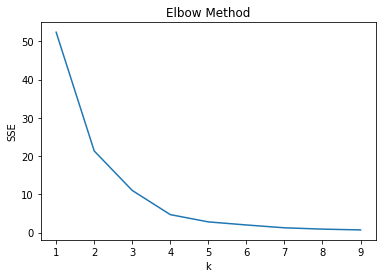

In [207]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [208]:
# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [209]:
# Add predicted values onto the original dataframe
df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = encoded_table_kmeans.join(df_y, how='inner')
combined

,Country,State,Year,GDP,Population,Sector,allghg,CH4,CO2,N2O,F-Gas,StateEncoded,SectorEncoded,Cluster
0,US,AL,0,3.724787e+10,4367935,Agriculture,6.889241,3.392917,0.016045,4.028508,1.128290,1,0,0
1,US,AL,1,3.936806e+10,4404701,Agriculture,6.954451,3.137611,0.016269,3.751630,1.290703,1,0,0
2,US,AL,2,4.151366e+10,4430141,Agriculture,6.560038,3.074048,0.013043,3.880403,1.376542,1,0,0
3,US,AL,3,4.258337e+10,4452173,Agriculture,6.298967,2.959365,0.002420,3.600673,1.521127,1,0,0
4,US,AL,4,4.334858e+10,4467634,Agriculture,6.374233,2.899730,0.007422,3.399237,1.600098,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,US,VA,17,1.703180e+11,8315430,Industry,12.283232,0.000000,0.000000,0.000000,0.000000,45,7,0
12316,US,VA,18,1.762570e+11,8367303,Industry,11.409030,0.000000,0.000000,0.000000,0.000000,45,7,0
12317,US,VA,19,1.810080e+11,8417651,Industry,11.365035,0.000000,0.000000,0.000000,0.000000,45,7,0
12318,US,VA,20,1.822380e+11,8471011,Industry,11.225011,0.000000,0.000000,0.000000,0.000000,45,7,0


In [219]:
combined.loc[combined['Cluster'] == 0].sort_values(by = ['Sector'])

,Country,State,Year,GDP,Population,Sector,allghg,CH4,CO2,N2O,F-Gas,StateEncoded,SectorEncoded,Cluster
0,US,AL,0,3.724787e+10,4367935,Agriculture,6.889241,3.392917,0.016045,4.028508,1.12829,1,0,0
11622,US,UT,6,2.989164e+10,2360137,Agriculture,3.840000,0.000000,40.381556,0.000000,0.00000,44,0,0
11621,US,UT,5,2.831277e+10,2324815,Agriculture,3.890000,0.000000,42.157937,0.000000,0.00000,44,0,0
11620,US,UT,4,2.648106e+10,2283715,Agriculture,3.890000,0.000000,43.345341,0.000000,0.00000,44,0,0
11619,US,UT,3,2.571705e+10,2244502,Agriculture,3.890000,0.000000,45.277944,0.000000,0.00000,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,US,NJ,0,1.130560e+11,8218808,Waste,5.391391,0.011042,0.012632,0.001167,0.00000,31,11,0
8163,US,NJ,1,1.101130e+11,8287418,Waste,4.797785,0.010606,0.012632,0.001205,0.00000,31,11,0
7384,US,NE,14,4.662294e+10,1840914,Waste,1.008530,0.037330,0.376121,5.364000,0.00000,29,11,0
3688,US,IL,14,2.688400e+11,12867783,Waste,10.268969,3.007771,77.261608,0.236071,0.00000,14,11,0


In [220]:
#Scatter GDP vs GHG
px.scatter_3d(x=combined['GDP'], y= combined['allghg'], z=combined['Population'], color=combined['Cluster'])

# Deep Learning Neural Network

In [221]:
# Pick features and Scale Training Data
X = encoded_table[['StateEncoded','Year','GDP', 'Population']]
y = encoded_table['allghg']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1677: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.



In [228]:
# Dimensionality Reduction
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components
emissions_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = emissions_pca, columns = ['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)
pca_df

[0.49737543 0.25108021 0.2416679 ]


,PC1,PC2,PC3
0,-0.642435,-2.287242,0.225695
1,-0.600266,-2.193124,0.105982
2,-0.559145,-2.098874,-0.014064
3,-0.523663,-2.004816,-0.134807
4,-0.490358,-1.910749,-0.255920
...,...,...,...
13459,-0.970788,2.007902,0.004112
13460,-0.951135,2.101567,-0.118763
13461,-0.929948,2.195366,-0.241549
13462,-0.898559,2.289674,-0.363271


In [230]:
# Build Model

number_input_features = len(pca_df['PC1'])
hidden_nodes_layer_one = 24
hidden_nodes_layer_two = 12
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer_one, input_dim = number_input_features, activation = "tanh"))
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer_two, activation = "softmax"))
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Fit Model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)
model_loss, model_accuracy = nn.evaluate(pca_df,y, verbose = 2)
print(f"Loss: {model_loss} Accuracy: {model_accuracy}")

Epoch 1/100


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 13464), found shape=(None, 5)
